In [1]:
import pandas as pd
import os

In [2]:
os.chdir('C:\\Users\\Antonio\\OneDrive - Instituto Superior de Estatística e Gestão de Informação\\Big data in cloud platforms\\ml-100k\\ml-100k')

In [3]:
r_cols = ['userID' , 'movieID', 'rating', 'timestamp']
ratings = pd.read_csv('u.data',sep='\t', names = r_cols)
ratings.head()

,userID,movieID,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
i_cols=['movieID',
'movieTitle',
'releaseDate',
'videoReleaseDate',
'url',
'unknown',
'Action',
'Adventure',
'Animation',
'Childrens',
'Comedy',
'Crime',
'Documentary',
'Drama',
'Fantasy',
'FilmNoir',
'Horror',
'Musical',
'Mystery',
'Romance',
'SciFi',
'Thriller',
'War',
'Western']
movies = pd.read_csv('u.item',sep='\|', names=i_cols, skiprows=1)
movies.head()

C:\Users\Antonio\Anaconda\lib\site-packages\ipykernel_launcher.py:25: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


,movieID,movieTitle,releaseDate,videoReleaseDate,url,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
u_cols = ['userID', 'age', 'gender', 'occupation', 'zipCode']
users = pd.read_csv('u.user',sep='\|', names=u_cols)
users.head()

C:\Users\Antonio\Anaconda\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,userID,age,gender,occupation,zipCode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
data = pd.merge(ratings,movies,on='movieID')
data = pd.merge(data,users,on='userID')
data.sample(5)

,userID,movieID,rating,timestamp,movieTitle,releaseDate,videoReleaseDate,url,unknown,Action,...,Mystery,Romance,SciFi,Thriller,War,Western,age,gender,occupation,zipCode
6098,181,294,2,878961173,Liar Liar (1997),21-Mar-1997,NaN,http://us.imdb.com/Title?Liar+Liar+(1997),0,0,...,0,0,0,0,0,0,26,M,executive,21218
33077,158,123,3,880132488,"Frighteners, The (1996)",19-Jul-1996,NaN,"http://us.imdb.com/M/title-exact?Frighteners,%...",0,0,...,0,0,0,0,0,0,50,M,educator,27606
75947,583,175,5,879384471,Brazil (1985),01-Jan-1985,NaN,http://us.imdb.com/M/title-exact?Brazil%20(1985),0,0,...,0,0,1,0,0,0,44,M,engineer,29631
3480,144,70,4,888105587,Four Weddings and a Funeral (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Four%20Weddin...,0,0,...,0,1,0,0,0,0,53,M,programmer,20910
13603,707,251,5,880059647,Shall We Dance? (1996),11-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Shall%20we%20...,0,0,...,0,0,0,0,0,0,56,F,librarian,19146


In [7]:
data.drop(['movieTitle','videoReleaseDate','url','timestamp'],inplace=True,axis=1)

In [8]:
import numpy as np
data['year']=pd.to_numeric(data['releaseDate'].str[-4:]).fillna(0).astype(np.int64)

In [9]:
data.drop(['releaseDate'], inplace=True, axis=1)

In [10]:
data.groupby('rating')['rating'].count()

rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: rating, dtype: int64


# Trying an unbalanced random forest

In [75]:
dumData=pd.get_dummies(data.drop(['userID','movieID'], axis=1))

In [76]:
from sklearn.model_selection import train_test_split

In [77]:

X_train, X_test, y_train, y_test = train_test_split(dumData.drop(columns='rating'), dumData.rating, random_state=0, test_size=0.25)

In [78]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=8,random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [79]:
preds = clf.predict(X_test)

In [80]:
(preds == y_test).sum() / y_test.size

0.34888

In [81]:
pd.Series(preds).value_counts()

4    24713
3      239
5       41
1        7
dtype: int64

In [82]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, preds))

In [83]:
rms

1.2058026372503918

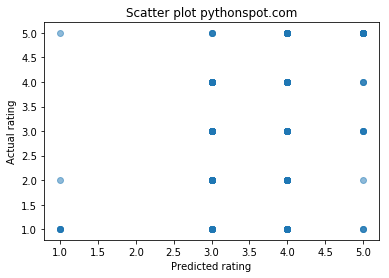

In [84]:
import matplotlib.pyplot as plt
plt.scatter(preds, y_test, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('Predicted rating')
plt.ylabel('Actual rating')
plt.show()

In [85]:
df_confusion = pd.crosstab(y_test, preds)
df_conf_norm = df_confusion.div(df_confusion.sum(axis=1), axis=0)
df_conf_norm

col_0,1,3,4,5
rating,,,,
1,0.003320,0.007968,0.986720,0.001992
2,0.000363,0.025399,0.973875,0.000363
3,0.000000,0.018871,0.980398,0.000731
4,0.000000,0.002795,0.996855,0.000349
5,0.000188,0.000752,0.993604,0.005455


In [86]:
s1=pd.Series(clf.feature_importances_)
s2=pd.Series(X_train.columns)
importance=pd.DataFrame(data=pd.concat([s2, s1], axis=1))
importance.sort_values(by=[1],ascending=False)

,0,1
20,year,0.180152
8,Drama,0.070082
137,zipCode_10019,0.057118
17,War,0.043604
525,zipCode_60657,0.042498
241,zipCode_21218,0.039457
30,occupation_healthcare,0.030006
5,Comedy,0.028605
19,age,0.025329
625,zipCode_80027,0.017641



# Let's try SMOTE to balance

In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [87]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [88]:
pd.Series(y_train_res).value_counts()

5    25588
4    25588
3    25588
2    25588
1    25588
dtype: int64

In [89]:
clf.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [90]:
preds2 = clf.predict(X_test)

In [91]:
(preds2 == y_test).sum() / y_test.size

0.29408

In [92]:
pd.Series(preds2).value_counts()

5    9564
4    4781
1    4117
2    3433
3    3105
dtype: int64

In [93]:
rms2 = sqrt(mean_squared_error(y_test, preds2))

In [94]:
rms2

1.6065117491011387

In [95]:
df_confusion2 = pd.crosstab(y_test, preds2)
df_conf_norm2 = df_confusion2.div(df_confusion2.sum(axis=1), axis=0)
df_conf_norm2

col_0,1,2,3,4,5
rating,,,,,
1,0.453519,0.162019,0.102258,0.116202,0.166003
2,0.227504,0.226052,0.157112,0.154209,0.235123
3,0.161937,0.174517,0.163253,0.186805,0.313487
4,0.127650,0.114605,0.118216,0.226997,0.412532
5,0.113619,0.073175,0.072799,0.179646,0.560760


In [96]:
s1=pd.Series(clf.feature_importances_)
s2=pd.Series(X_train.columns)
importance=pd.DataFrame(data=pd.concat([s2, s1], axis=1))
importance.sort_values(by=[1],ascending=False)

,0,1
20,year,0.148569
137,zipCode_10019,0.102645
8,Drama,0.093273
241,zipCode_21218,0.049855
30,occupation_healthcare,0.045545
17,War,0.042810
19,age,0.041881
14,Romance,0.041822
525,zipCode_60657,0.022782
16,Thriller,0.021304


In [123]:
me=pd.Series([0,
    0,
1,
1,
1,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
28,
1995,
0,
1,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
1,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,0])

In [124]:
clf.predict(me.values.reshape(1,-1))

array([5], dtype=int64)

In [126]:
"""
estimator = clf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = ['1','2','3','4','5'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')
"""

"\nestimator = clf.estimators_[5]\n\nfrom sklearn.tree import export_graphviz\n# Export as dot file\nexport_graphviz(estimator, out_file='tree.dot', \n                feature_names = X_train.columns,\n                class_names = ['1','2','3','4','5'],\n                rounded = True, proportion = False, \n                precision = 2, filled = True)\n\n# Convert to png using system command (requires Graphviz)\nfrom subprocess import call\ncall(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])\n\n# Display in jupyter notebook\nfrom IPython.display import Image\nImage(filename = 'tree.png')\n"

# Let's try clustering K-means

In [79]:
from sklearn.cluster import KMeans

In [80]:
user_cluster = pd.merge(users,ratings,on='userID')

In [82]:
user_cluster.drop(['timestamp'],inplace=True,axis=1)

In [84]:
user_cluster.set_index(user_cluster['userID'], inplace = True)

In [87]:
user_cluster=pd.get_dummies(user_cluster)

In [88]:
km = KMeans(n_clusters = 3)

In [89]:
km.fit(user_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [90]:
user_cluster['k_means']=km.labels_

In [109]:
clusters = pd.merge(users,ratings,on='userID')

In [116]:
clusters['k_means'] = km.labels_

In [118]:
import seaborn as sns

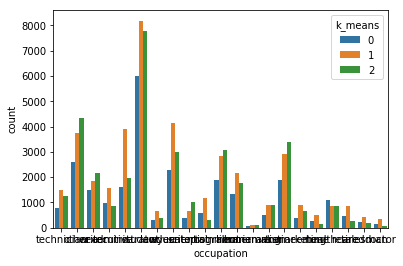

In [119]:
sns.countplot(x="occupation", hue="k_means", data=clusters)

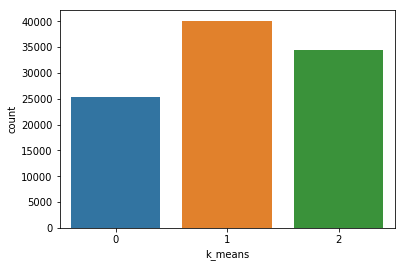

In [121]:
sns.countplot(x="k_means", data=clusters)

([array([ 164., 3576., 5981., 6321., 2984., 2284., 2597.,  670.,  647.,
          112.]),
  array([  111.,  4106.,  8579., 10620.,  5164.,  3773.,  5337.,  1176.,
          1195.,    59.]),
  array([ 323., 4033., 7194., 9735., 4564., 4069., 2637., 1182.,  533.,
          274.])],
 array([ 7. , 13.6, 20.2, 26.8, 33.4, 40. , 46.6, 53.2, 59.8, 66.4, 73. ]),
 <a list of 3 Lists of Patches objects>)

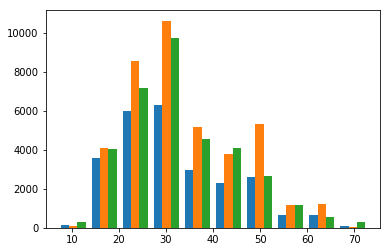

In [136]:
import matplotlib.pyplot as plt
plt.hist([clusters.query('k_means==[0]')['age'], clusters.query('k_means==[1]')['age'], clusters.query('k_means==[2]')['age']])